## ¿Qué es matplotlib?

* Estándar *de facto* para visualización en Python
* Pretende ser similar a las funciones de visualización de MATLAB
* Diferentes formas de usarla: interfaz `pyplot` y orientada a objetos

Lo primero que vamos a hacer es activar el modo *inline* - de esta manera las figuras aparecerán automáticamente incrustadas en el notebook.

In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

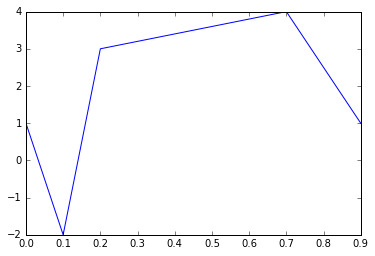

In [3]:
plt.plot([0.0, 0.1, 0.2, 0.7, 0.9], [1, -2, 3, 4, 1])

In [4]:
def f(x):
    return np.exp(-x ** 2)

In [5]:
x = np.linspace(-1, 3, 100)

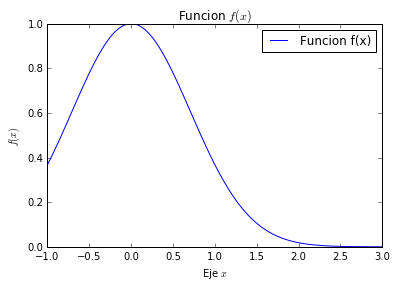

In [6]:
plt.plot(x, f(x), label="Funcion f(x)")
plt.xlabel("Eje $x$")
plt.ylabel("$f(x)$")
plt.legend()
plt.title("Funcion $f(x)$")

Notamos varias cosas:

* Con diversas llamadas a funciones dentro de `plt.` se actualiza el gráfico *actual*. Esa es la forma de trabajar con la interfaz pyplot.
* Podemos añadir etiquetas, y escribir $\LaTeX$ en ellas. Tan solo hay que encerrarlo entre signos de dólar $$.
* Añadiendo como argumento `label` podemos definir una leyenda.

### Personalización

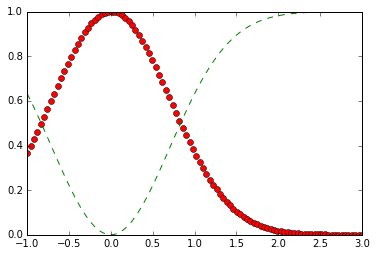

In [7]:
plt.plot(x, f(x), 'ro')
plt.plot(x, 1 - f(x), 'g--')

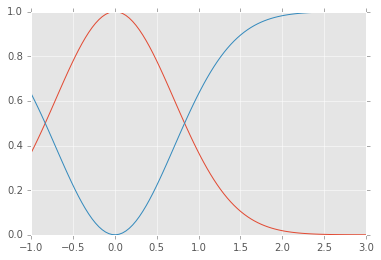

In [8]:
with plt.style.context('ggplot'):
    plt.plot(x, f(x))
    plt.plot(x, 1 - f(x))

/usr/lib64/python3.4/site-packages/matplotlib/font_manager.py:1288: UserWarning: findfont: Font family ['Humor Sans', 'Comic Sans MS'] not found. Falling back to Bitstream Vera Sans
  (prop.get_family(), self.defaultFamily[fontext]))


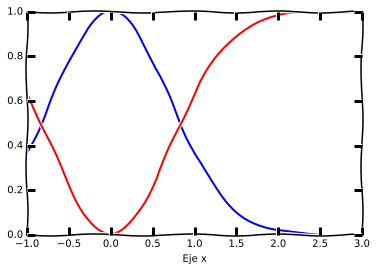

In [9]:
with plt.xkcd():
    plt.plot(x, f(x))
    plt.plot(x, 1 - f(x))
    plt.xlabel("Eje x")

### Otros tipo de gráficas

La función `scatter` muestra una nube de puntos, con posibilidad de variar también el tamaño y el color.

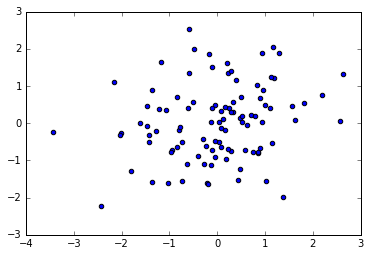

In [10]:
N = 100
x = np.random.randn(N)
y = np.random.randn(N)

plt.scatter(x, y)

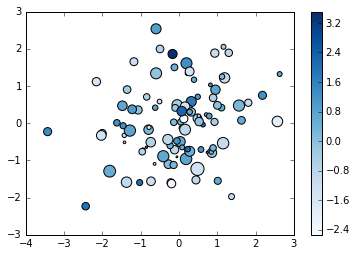

In [11]:
s = np.abs(50 + 50 * np.random.randn(N))
c = np.random.randn(N)

plt.scatter(x, y, s=s, c=c, cmap=plt.cm.Blues)
plt.colorbar()

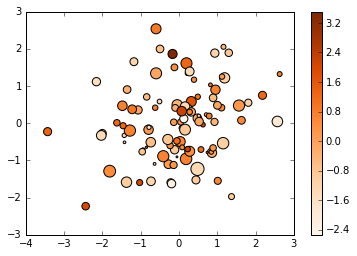

In [12]:
plt.scatter(x, y, s=s, c=c, cmap=plt.cm.Oranges)
plt.colorbar()

La función `contour` se utiliza para visualizar las curvas de nivel de funciones de dos variables y está muy ligada a la función `np.meshgrid`. Veamos un ejemplo:

$$f(x) = x^2 - y^2$$

In [13]:
def f(x, y):
    return x ** 2 - y ** 2

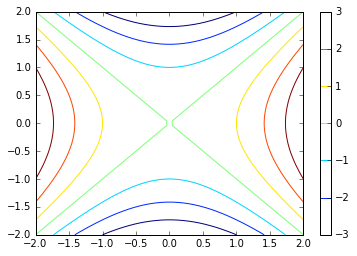

In [14]:
x = np.linspace(-2, 2)
y = np.linspace(-2, 2)
xx, yy = np.meshgrid(x, y)
zz = f(xx, yy)

plt.contour(xx, yy, zz)
plt.colorbar()

La función `contourf` es casi idéntica pero rellena el espacio entre niveles. Podemos especificar manualmente estos niveles usando el cuarto argumento:

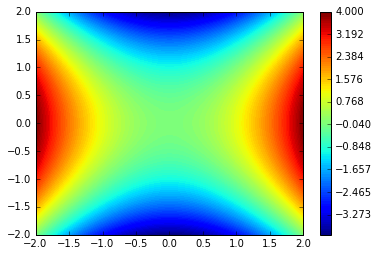

In [15]:
plt.contourf(xx, yy, zz, np.linspace(-4, 4, 100))
plt.colorbar()

Para guardar las gráficas en archivos aparte podemos usar la función `plt.savefig`. matplotlib usará el tipo de archivo adecuado según la extensión que especifiquemos. Veremos esto con más detalle cuando hablemos de la interfaz orientada a objetos.

### Varias figuras

Podemos crear figuras con varios sistemas de ejes, pasando a `subplot` el número de filas y de columnas.

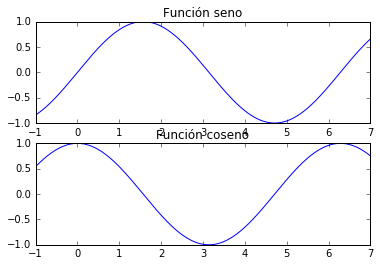

In [16]:
x = np.linspace(-1, 7, 1000)

fig = plt.figure()
plt.subplot(211)
plt.plot(x, np.sin(x))
plt.grid(False)
plt.title("Función seno")

plt.subplot(212)
plt.plot(x, np.cos(x))
plt.grid(False)
plt.title("Función coseno")

Como hemos guardado la figura en una variable, puedo recuperarla más adelate y seguir editándola.

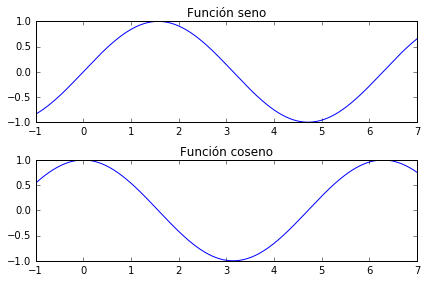

In [17]:
fig.tight_layout()
fig

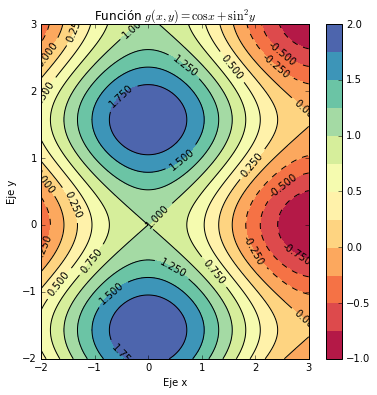

In [18]:
def g(x, y):
    return np.cos(x) + np.sin(y) ** 2

# Necesitamos muchos puntos en la malla, para que cuando se
# crucen las líneas no se vean irregularidades
x = np.linspace(-2, 3, 1000)
y = np.linspace(-2, 3, 1000)

xx, yy = np.meshgrid(x, y)

zz = g(xx, yy)

# Podemos ajustar el tamaño de la figura con figsize
fig = plt.figure(figsize=(6, 6))

# Ajustamos para que tenga 13 niveles y que use el colormap Spectral
# Tenemos que asignar la salida a la variable cs para luego crear el colorbar
cs = plt.contourf(xx, yy, zz, np.linspace(-1, 2, 13), cmap=plt.cm.Spectral)

# Creamos la barra de colores
plt.colorbar()

# Con `colors='k'` dibujamos todas las líneas negras
# Asignamos la salida a la variable cs2 para crear las etiquetas
cs = plt.contour(xx, yy, zz, np.linspace(-1, 2, 13), colors='k')

# Creamos las etiquetas sobre las líneas
plt.clabel(cs)

# Ponemos las etiquetas de los ejes
plt.xlabel("Eje x")
plt.ylabel("Eje y")
plt.title(r"Función $g(x, y) = \cos{x} + \sin^2{y}$")

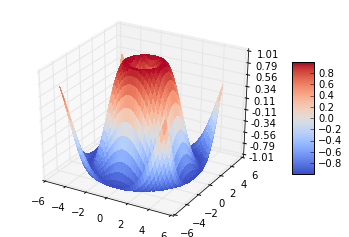

In [19]:
from mpl_toolkits.mplot3d.axes3d import Axes3D, get_test_data
from matplotlib.ticker import LinearLocator, FormatStrFormatter

fig = plt.figure()
ax = fig.gca(projection='3d')
X = np.arange(-5, 5, 0.25)
Y = np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(X, Y)
R = np.sqrt(X**2 + Y**2)
Z = np.sin(R)
surf = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=plt.cm.coolwarm,
                       linewidth=0, antialiased=False)
ax.set_zlim(-1.01, 1.01)

ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()